# Chapter 12: Data processing and analysis with `pandas`

Robert Johansson

Source code listings for [Numerical Python - A Practical Techniques Approach for Industry](http://www.apress.com/9781484205549) (ISBN 978-1-484205-54-9).

The source code listings can be downloaded from http://www.apress.com/9781484205549

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib as mpl
mpl.style.use('ggplot')

## Series object

In [8]:
s = pd.Series([909976, 8615246, 2872086, 2273305, 1200000, 450000])
s

0     909976
1    8615246
2    2872086
3    2273305
4    1200000
5     450000
dtype: int64

In [9]:
s.dtype

dtype('int64')

In [10]:
s.index

RangeIndex(start=0, stop=6, step=1)

In [11]:
s.values

array([ 909976, 8615246, 2872086, 2273305, 1200000,  450000])

In [12]:
s.index = ["Stockholm", "London", "Rome", "Paris", 'La Paz', 'Palma']

In [12]:
s.name = "Population"
s

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
La Paz       1200000
Palma         450000
Name: Population, dtype: int64

In [13]:
s = pd.Series([909976, 8615246, 2872086, 2273305, 1200000, 450000], 
              index=["Stockholm", "London", "Rome", "Paris", 'La Paz', 'Palma'], name="Population")

In [14]:
s["London"]

8615246

In [15]:
s.Stockholm

909976

In [16]:
s[["Paris", "Rome"]]

Paris    2273305
Rome     2872086
Name: Population, dtype: int64

In [17]:
s.median(), s.mean(), s.std()

(1736652.5, 2720102.1666666665, 3023775.083993016)

In [19]:
s.min(), s.max()

(450000, 8615246)

In [18]:
s.quantile(q=0.25), s.quantile(q=0.5), s.quantile(q=0.75)

(982482.0, 1736652.5, 2722390.75)

In [20]:
s.describe()

count    6.000000e+00
mean     2.720102e+06
std      3.023775e+06
min      4.500000e+05
25%      9.824820e+05
50%      1.736652e+06
75%      2.722391e+06
max      8.615246e+06
Name: Population, dtype: float64

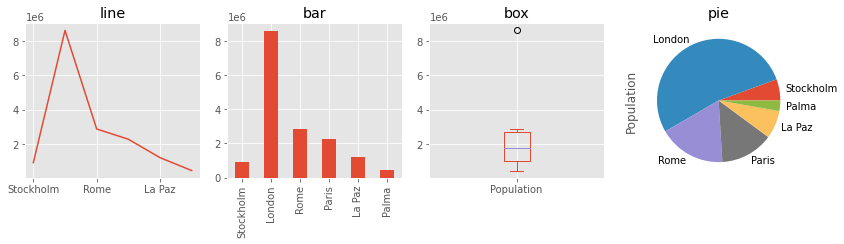

In [21]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3.5))

s.plot(ax=axes[0], kind='line', title="line")
s.plot(ax=axes[1], kind='bar', title="bar")
s.plot(ax=axes[2], kind='box', title="box")
s.plot(ax=axes[3], kind='pie', title="pie")

fig.tight_layout()
# fig.savefig("ch12-series-plot.pdf")
# fig.savefig("ch12-series-plot.png")

## DataFrame object

In [26]:
df = pd.DataFrame([[909976, 8615246, 2872086, 2273305, 4600000, 100000],
                   ["Sweden", "United kingdom", "Italy", "France", 'Spain', 'Bolivia']])
df

,0,1,2,3,4,5
0,909976,8615246,2872086,2273305,4600000,100000
1,Sweden,United kingdom,Italy,France,Spain,Bolivia


In [25]:
df = pd.DataFrame([[909976, "Sweden"],
                   [8615246, "United kingdom"], 
                   [2872086, "Italy"],
                   [2273305, "France"]])
df

,0,1
0,909976,Sweden
1,8615246,United kingdom
2,2872086,Italy
3,2273305,France


In [27]:
df.index = ['Population','Country']

In [29]:
df.columns = ["Sweden", "United kingdom", "Italy", "France", 'Spain', 'Bolivia']

In [30]:
df

,Sweden,United kingdom,Italy,France,Spain,Bolivia
Population,909976,8615246,2872086,2273305,4600000,100000
Country,Sweden,United kingdom,Italy,France,Spain,Bolivia


In [ ]:
df = pd.DataFrame([[909976, "Sweden"],
                   [8615246, "United kingdom"], 
                   [2872086, "Italy"],
                   [2273305, "France"]],
                  index=["Stockholm", "London", "Rome", "Paris"],
                  columns=["Population", "State"])

In [31]:
df = pd.DataFrame({"Population": [909976, 8615246, 2872086, 2273305],
                   "State": ["Sweden", "United kingdom", "Italy", "France"]},
                  index=["Stockholm", "London", "Rome", "Paris"])

In [32]:
df

,Population,State
Stockholm,909976,Sweden
London,8615246,United kingdom
Rome,2872086,Italy
Paris,2273305,France


In [31]:
df.index

Index(['Stockholm', 'London', 'Rome', 'Paris'], dtype='object')

In [32]:
df.columns

Index(['Population', 'State'], dtype='object')

In [29]:
df.values

array([[909976, 'Sweden'],
       [8615246, 'United kingdom'],
       [2872086, 'Italy'],
       [2273305, 'France']], dtype=object)

In [33]:
df.Population

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

In [ ]:
type(df.Population)

In [ ]:
df.Population.Stockholm

In [34]:
type(df.index)

pandas.core.indexes.base.Index

In [35]:
df.loc["Stockholm"]

Population    909976
State         Sweden
Name: Stockholm, dtype: object

In [35]:
type(df.loc["Stockholm"])

pandas.core.series.Series

In [36]:
df.loc[["Paris", "Rome"]]

,Population,State
Paris,2273305,France
Rome,2872086,Italy


In [37]:
df.loc[["Paris", "Rome"], "Population"]

Paris    2273305
Rome     2872086
Name: Population, dtype: int64

In [38]:
df.loc["Paris", "Population"]

2273305

In [38]:
df.Population.mean()

3667653.25

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Stockholm to Paris
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Population  4 non-null      int64 
 1   State       4 non-null      object
dtypes: int64(1), object(1)
memory usage: 268.0+ bytes


In [40]:
df.dtypes

Population     int64
State         object
dtype: object

In [41]:
df.head()

,Population,State
Stockholm,909976,Sweden
London,8615246,United kingdom
Rome,2872086,Italy
Paris,2273305,France


In [47]:
s.head()

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
La Paz       1200000
Name: Population, dtype: int64

<AxesSubplot:title={'center':'pie'}, ylabel='Population'>

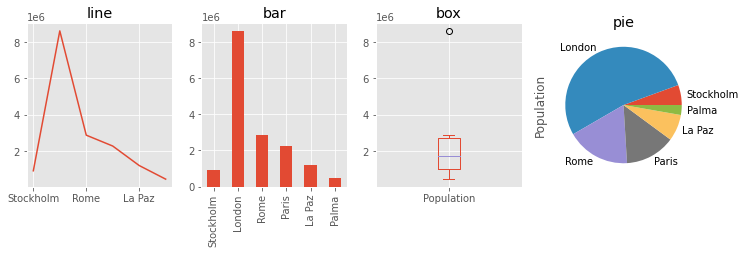

In [42]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
s.plot(ax=axes[0], kind='line', title='line')
s.plot(ax=axes[1], kind='bar', title='bar')
s.plot(ax=axes[2], kind='box', title='box')
s.plot(ax=axes[3], kind='pie', title='pie')

<AxesSubplot:title={'center':'box'}>

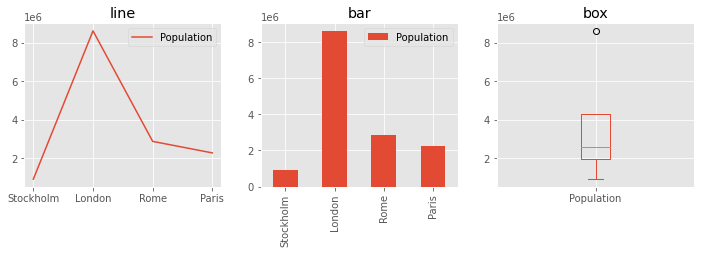

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
df.plot(ax=axes[0], kind='line', title='line')
df.plot(ax=axes[1], kind='bar', title='bar')
df.plot(ax=axes[2], kind='box', title='box')
# df.plot(ax=axes[3], kind='pie', title='pie')

In [ ]:
!head -n5 /home/rob/datasets/european_cities.csv

## Larger dataset

In [48]:
df_pop = pd.read_csv("data/european.csv")

In [49]:
df_pop.head()

,Rank,City,State,Population,Date of census/estimate
0,1,London[2],United Kingdom,"8,615,246",1 June 2014
1,2,Berlin,Germany,"3,437,916",31 May 2014
2,3,Madrid,Spain,"3,165,235",1 January 2014
3,4,Rome,Italy,"2,872,086",30 September 2014
4,5,Paris,France,"2,273,305",1 January 2013


In [4]:
df_pop = pd.read_csv("data/european.csv", delimiter=",", encoding="utf-8", header=0)

In [18]:
df_pop.shape

(105, 5)

In [5]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Rank                     105 non-null    int64 
 1   City                     105 non-null    object
 2   State                    105 non-null    object
 3   Population               105 non-null    object
 4   Date of census/estimate  105 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.2+ KB


In [6]:
df_pop.head()

,Rank,City,State,Population,Date of census/estimate
0,1,London[2],United Kingdom,"8,615,246",1 June 2014
1,2,Berlin,Germany,"3,437,916",31 May 2014
2,3,Madrid,Spain,"3,165,235",1 January 2014
3,4,Rome,Italy,"2,872,086",30 September 2014
4,5,Paris,France,"2,273,305",1 January 2013


In [7]:
df_pop["Population"] = df_pop.Population.apply(lambda x: int(x.replace(",", "")))

In [8]:
df_pop["State"].values[:3]

array([' United Kingdom', ' Germany', ' Spain'], dtype=object)

In [9]:
df_pop["State"] = df_pop["State"].apply(lambda x: x.strip())

In [10]:
df_pop.head()

,Rank,City,State,Population,Date of census/estimate
0,1,London[2],United Kingdom,8615246,1 June 2014
1,2,Berlin,Germany,3437916,31 May 2014
2,3,Madrid,Spain,3165235,1 January 2014
3,4,Rome,Italy,2872086,30 September 2014
4,5,Paris,France,2273305,1 January 2013


In [63]:
df_pop.dtypes

Rank                        int64
City                       object
State                      object
Population                  int64
Date of census/estimate    object
dtype: object

In [11]:
df_pop2 = df_pop.set_index("City")

In [12]:
df_pop2 = df_pop2.sort_index()

In [13]:
df_pop2.head()

,Rank,State,Population,Date of census/estimate
City,,,,
Aarhus,92,Denmark,326676,1 October 2014
Alicante,86,Spain,334678,1 January 2012
Amsterdam,23,Netherlands,813562,31 May 2014
Antwerp,59,Belgium,510610,1 January 2014
Athens,34,Greece,664046,24 May 2011


In [14]:
df_pop3 = df_pop.set_index(["State", "City"]).sort_index(level=0)

In [15]:
df_pop3.head(7)

Rank  Population Date of census/estimate
State    City                                                  
Austria  Vienna           7     1794770          1 January 2015
Belgium  Antwerp         59      510610          1 January 2014
         Brussels[17]    16     1175831          1 January 2014
Bulgaria Plovdiv         84      341041        31 December 2013
         Sofia           14     1291895        14 December 2014
         Varna           85      335819        31 December 2013
Croatia  Zagreb          24      790017           31 March 2011

In [16]:
df_pop3.loc["Sweden"]

,Rank,Population,Date of census/estimate
City,,,
Gothenburg,53,528014,31 March 2013
Malmö,102,309105,31 March 2013
Stockholm,20,909976,31 January 2014


In [19]:
df_pop3.loc[("Sweden", "Gothenburg")]

Rank                                  53
Population                        528014
Date of census/estimate    31 March 2013
Name: (Sweden, Gothenburg), dtype: object

In [20]:
df_pop.set_index("City").sort_values(["State", "Population"], ascending=[True, True]).head()

,Rank,State,Population,Date of census/estimate
City,,,,
Vienna,7,Austria,1794770,1 January 2015
Antwerp,59,Belgium,510610,1 January 2014
Brussels[17],16,Belgium,1175831,1 January 2014
Varna,85,Bulgaria,335819,31 December 2013
Plovdiv,84,Bulgaria,341041,31 December 2013


In [21]:
city_counts = df_pop.State.value_counts()

In [22]:
city_counts.name = "# cities in top 105"
city_counts

Germany                     19
United Kingdom              16
Spain                       13
Poland                      10
Italy                       10
France                       5
Netherlands                  4
Bulgaria                     3
Sweden                       3
Romania                      3
Czech Republic               2
Belgium                      2
Greece                       2
Denmark                      2
Lithuania                    2
Hungary                      1
Austria                      1
Croatia                      1
Latvia                       1
Finland                      1
Portugal                     1
Ireland                      1
Estonia                      1
Slovakia Slovak Republic     1
Name: # cities in top 105, dtype: int64

In [23]:
df_pop3 = df_pop[["State", "City", "Population"]].set_index(["State", "City"])

In [24]:
df_pop4 = df_pop3.groupby("State").sum().sort_values("Population", ascending=False)

In [25]:
df_pop4.head()

,Population
State,
United Kingdom,16011877
Germany,15119548
Spain,10041639
Italy,8764067
Poland,6267409


In [26]:
df_pop5 = (df_pop.drop("Rank", axis=1)
                 .groupby("State").sum()
                 .sort_values("Population", ascending=False))

In [27]:
df_pop5.head()

,Population
State,
United Kingdom,16011877
Germany,15119548
Spain,10041639
Italy,8764067
Poland,6267409


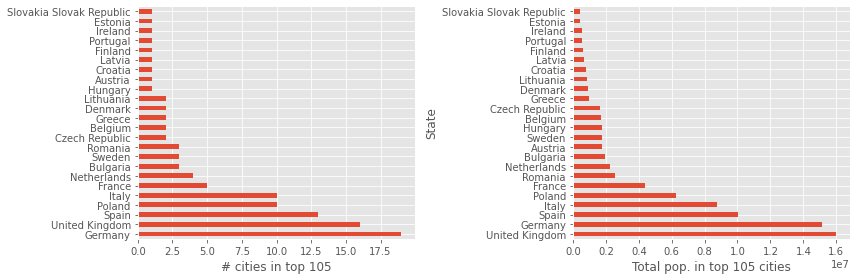

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

city_counts.plot(kind='barh', ax=ax1)
ax1.set_xlabel("# cities in top 105")

df_pop5.Population.plot(kind='barh', ax=ax2)
ax2.set_xlabel("Total pop. in top 105 cities")

fig.tight_layout()
# fig.savefig("ch12-state-city-counts-sum.pdf")

## Time series

### Basics

In [4]:
import datetime

In [31]:
pd.date_range("2015-1-1", periods=31)

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10', '2015-01-11', '2015-01-12',
               '2015-01-13', '2015-01-14', '2015-01-15', '2015-01-16',
               '2015-01-17', '2015-01-18', '2015-01-19', '2015-01-20',
               '2015-01-21', '2015-01-22', '2015-01-23', '2015-01-24',
               '2015-01-25', '2015-01-26', '2015-01-27', '2015-01-28',
               '2015-01-29', '2015-01-30', '2015-01-31'],
              dtype='datetime64[ns]', freq='D')

In [32]:
pd.date_range(datetime.datetime(2015, 1, 1), periods=31)

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10', '2015-01-11', '2015-01-12',
               '2015-01-13', '2015-01-14', '2015-01-15', '2015-01-16',
               '2015-01-17', '2015-01-18', '2015-01-19', '2015-01-20',
               '2015-01-21', '2015-01-22', '2015-01-23', '2015-01-24',
               '2015-01-25', '2015-01-26', '2015-01-27', '2015-01-28',
               '2015-01-29', '2015-01-30', '2015-01-31'],
              dtype='datetime64[ns]', freq='D')

In [35]:
pd.date_range("2015-1-1 00:00", "2015-1-1 23:00", freq="H")

DatetimeIndex(['2015-01-01 00:00:00', '2015-01-01 01:00:00',
               '2015-01-01 02:00:00', '2015-01-01 03:00:00',
               '2015-01-01 04:00:00', '2015-01-01 05:00:00',
               '2015-01-01 06:00:00', '2015-01-01 07:00:00',
               '2015-01-01 08:00:00', '2015-01-01 09:00:00',
               '2015-01-01 10:00:00', '2015-01-01 11:00:00',
               '2015-01-01 12:00:00', '2015-01-01 13:00:00',
               '2015-01-01 14:00:00', '2015-01-01 15:00:00',
               '2015-01-01 16:00:00', '2015-01-01 17:00:00',
               '2015-01-01 18:00:00', '2015-01-01 19:00:00',
               '2015-01-01 20:00:00', '2015-01-01 21:00:00',
               '2015-01-01 22:00:00', '2015-01-01 23:00:00'],
              dtype='datetime64[ns]', freq='H')

In [36]:
ts1 = pd.Series(np.arange(31), index=pd.date_range("2015-1-1", periods=31))

In [37]:
ts1.head()

2015-01-01    0
2015-01-02    1
2015-01-03    2
2015-01-04    3
2015-01-05    4
Freq: D, dtype: int64

In [43]:
ts1["2015-1-3"]

2

In [42]:
ts1.index[2]

Timestamp('2015-01-03 00:00:00', freq='D')

In [39]:
ts1.index[2].year, ts1.index[2].month, ts1.index[2].day

(2015, 1, 3)

In [40]:
ts1.index[2].nanosecond

0

In [41]:
ts1.index[2].to_pydatetime()

datetime.datetime(2015, 1, 3, 0, 0)

In [44]:
ts2 = pd.Series(np.random.rand(31), 
                index=pd.date_range("2015-8-1", periods=31))

In [45]:
ts2

2015-08-01    0.829790
2015-08-02    0.614440
2015-08-03    0.986427
2015-08-04    0.608578
2015-08-05    0.927604
2015-08-06    0.499590
2015-08-07    0.266556
2015-08-08    0.264731
2015-08-09    0.469212
2015-08-10    0.471394
2015-08-11    0.301064
2015-08-12    0.479868
2015-08-13    0.571963
2015-08-14    0.031046
2015-08-15    0.763687
2015-08-16    0.465749
2015-08-17    0.661633
2015-08-18    0.161848
2015-08-19    0.519541
2015-08-20    0.380837
2015-08-21    0.839007
2015-08-22    0.776317
2015-08-23    0.115681
2015-08-24    0.450760
2015-08-25    0.947583
2015-08-26    0.749451
2015-08-27    0.925262
2015-08-28    0.989984
2015-08-29    0.351635
2015-08-30    0.224377
2015-08-31    0.664456
Freq: D, dtype: float64

In [46]:
periods = pd.PeriodIndex([pd.Period('2015-01'), pd.Period('2015-02'), pd.Period('2015-03')])

In [47]:
ts3 = pd.Series(np.random.rand(3), periods)

In [48]:
ts3

2015-01    0.298179
2015-02    0.842044
2015-03    0.618319
Freq: M, dtype: float64

In [49]:
ts3.index

PeriodIndex(['2015-01', '2015-02', '2015-03'], dtype='period[M]')

In [50]:
ts2.to_period('M')

2015-08    0.829790
2015-08    0.614440
2015-08    0.986427
2015-08    0.608578
2015-08    0.927604
2015-08    0.499590
2015-08    0.266556
2015-08    0.264731
2015-08    0.469212
2015-08    0.471394
2015-08    0.301064
2015-08    0.479868
2015-08    0.571963
2015-08    0.031046
2015-08    0.763687
2015-08    0.465749
2015-08    0.661633
2015-08    0.161848
2015-08    0.519541
2015-08    0.380837
2015-08    0.839007
2015-08    0.776317
2015-08    0.115681
2015-08    0.450760
2015-08    0.947583
2015-08    0.749451
2015-08    0.925262
2015-08    0.989984
2015-08    0.351635
2015-08    0.224377
2015-08    0.664456
Freq: M, dtype: float64

In [51]:
pd.date_range("2015-1-1", periods=12, freq="M").to_period()

PeriodIndex(['2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
             '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12'],
            dtype='period[M]')

### Temperature time series example

In [ ]:
# !head -n 5 temperature_outdoor_2014.tsv

In [52]:
df1 = pd.read_csv('data/out_temp.tsv', delimiter="\t", names=["time", "outdoor"])

In [53]:
df2 = pd.read_csv('data/int_temp.tsv', delimiter="\t", names=["time", "indoor"])

In [54]:
df1.head()

,time,outdoor
0,1388530986,4.38
1,1388531586,4.25
2,1388532187,4.19
3,1388532787,4.06
4,1388533388,4.06


In [8]:
df2.head()

,time,indoor
0,1388530986,21.94
1,1388531586,22.00
2,1388532187,22.00
3,1388532787,22.00
4,1388533388,22.00


In [55]:
df1.time = (pd.to_datetime(df1.time.values, unit="s")
              .tz_localize('UTC').tz_convert('Europe/Stockholm'))

In [56]:
df1 = df1.set_index("time")

In [57]:
df2.time = (pd.to_datetime(df2.time.values, unit="s")
              .tz_localize('UTC').tz_convert('Europe/Madrid'))

In [58]:
df2 = df2.set_index("time")

In [13]:
df1.head()

,outdoor
time,
2014-01-01 00:03:06+01:00,4.38
2014-01-01 00:13:06+01:00,4.25
2014-01-01 00:23:07+01:00,4.19
2014-01-01 00:33:07+01:00,4.06
2014-01-01 00:43:08+01:00,4.06


In [14]:
df2.head()

,indoor
time,
2014-01-01 00:03:06+01:00,21.94
2014-01-01 00:13:06+01:00,22.00
2014-01-01 00:23:07+01:00,22.00
2014-01-01 00:33:07+01:00,22.00
2014-01-01 00:43:08+01:00,22.00


In [15]:
df1.index[0]

Timestamp('2014-01-01 00:03:06+0100', tz='Europe/Stockholm')

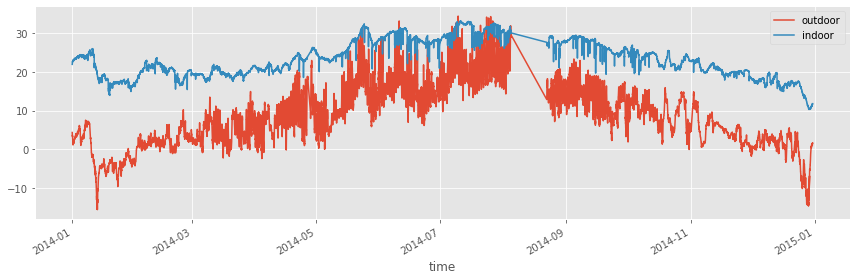

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
df1.plot(ax=ax)
df2.plot(ax=ax)

fig.tight_layout()
# fig.savefig("ch12-timeseries-temperature-2014.pdf")

In [ ]:
# select january data

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 99095 entries, 2014-01-01 00:03:06+01:00 to 2014-12-30 23:56:35+01:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   outdoor  99095 non-null  float64
dtypes: float64(1)
memory usage: 1.5 MB


In [18]:
df1_jan = df1[(df1.index > "2014-8-1") & (df1.index < "2014-10-1")]

In [19]:
df1.index < "2014-10-1"

array([ True,  True,  True, ..., False, False, False])

In [20]:
df1_jan.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12464 entries, 2014-08-01 00:07:10+02:00 to 2014-09-30 23:52:38+02:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   outdoor  12464 non-null  float64
dtypes: float64(1)
memory usage: 194.8 KB


In [21]:
df2_jan = df2["2014-8-1":"2014-9-30"]

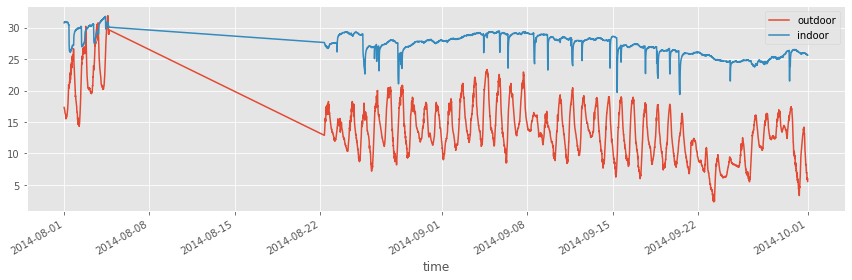

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

df1_jan.plot(ax=ax)
df2_jan.plot(ax=ax)

fig.tight_layout()
# fig.savefig("ch12-timeseries-selected-month.pdf")

In [ ]:
# group by month

In [18]:
df1_month = df1.reset_index()

In [19]:
df1_month["month"] = df1_month.time.apply(lambda x: x.month)

In [20]:
df1_month.head()

,time,outdoor,month
0,2014-01-01 00:03:06+01:00,4.38,1
1,2014-01-01 00:13:06+01:00,4.25,1
2,2014-01-01 00:23:07+01:00,4.19,1
3,2014-01-01 00:33:07+01:00,4.06,1
4,2014-01-01 00:43:08+01:00,4.06,1


In [21]:
df1_month = df1_month.groupby("month").aggregate(np.mean)

In [22]:
df2_month = df2.reset_index()

In [23]:
df2_month["month"] = df2_month.time.apply(lambda x: x.month)

In [27]:
df2_month = df2_month.groupby("month").agg(np.mean)

In [28]:
df_month = df1_month.join(df2_month)

In [29]:
df_month.head(3)

,outdoor,indoor
month,,
1,-1.777338,19.862590
2,2.231613,20.231507
3,4.615437,19.597748


In [30]:
df_month = pd.concat([df.to_period("M").groupby(level=0).mean() for df in [df1, df2]], axis=1)

/home/dani/anaconda3/envs/fm/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [31]:
df_month.head(3)

,outdoor,indoor
time,,
2014-01,-1.777338,19.862590
2014-02,2.231613,20.231507
2014-03,4.615437,19.597748


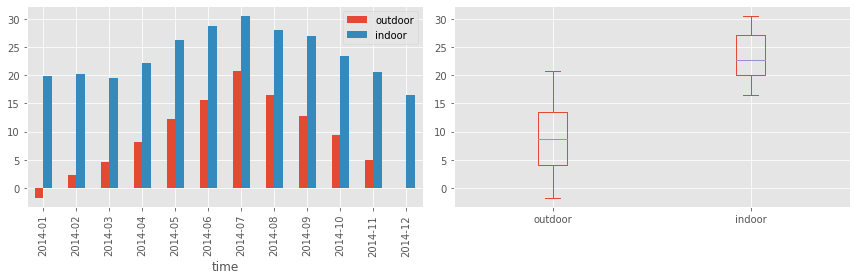

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

df_month.plot(kind='bar', ax=axes[0])
df_month.plot(kind='box', ax=axes[1])

fig.tight_layout()
#fig.savefig("ch12-grouped-by-month.pdf")

In [33]:
df_month

,outdoor,indoor
time,,
2014-01,-1.777338,19.862590
2014-02,2.231613,20.231507
2014-03,4.615437,19.597748
2014-04,8.105193,22.149754
2014-05,12.261396,26.332160
2014-06,15.586955,28.687491
2014-07,20.780314,30.605333
2014-08,16.494823,28.099068
2014-09,12.823905,26.950366


In [ ]:
# resampling

In [34]:
df1_hour = df1.resample("H").mean()

In [35]:
df1_hour.columns = ["outdoor (hourly avg.)"]

In [36]:
df1_day = df1.resample("D").mean()

In [37]:
df1_day.columns = ["outdoor (daily avg.)"]

In [38]:
df1_week = df1.resample("7D").mean()

In [39]:
df1_week.columns = ["outdoor (weekly avg.)"]

In [40]:
df1_month = df1.resample("M").mean()

In [41]:
df1_month.columns = ["outdoor (monthly avg.)"]

In [44]:
df_diff = (df1.resample("D").mean().outdoor - df2.resample("D").mean().indoor)

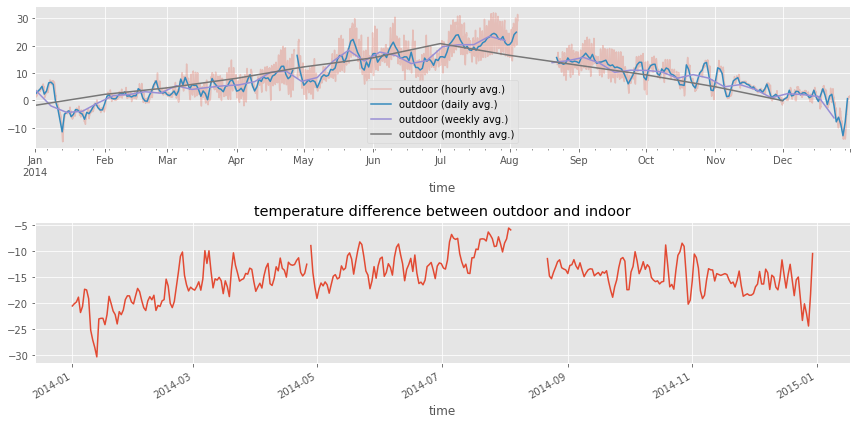

In [45]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

df1_hour.plot(ax=ax1, alpha=0.25)
df1_day.plot(ax=ax1)
df1_week.plot(ax=ax1)
df1_month.plot(ax=ax1)

df_diff.plot(ax=ax2)
ax2.set_title("temperature difference between outdoor and indoor")

fig.tight_layout()
#fig.savefig("ch12-timeseries-resampled.pdf")

In [60]:
pd.concat([df2.resample("5min").mean().rename(columns={"outdoor": 'None'}),
           df2.resample("5min").ffill().rename(columns={"outdoor": 'ffill'}),
           df2.resample("5min").bfill().rename(columns={"outdoor": 'bfill'})], axis=1).head()

,indoor,indoor,indoor
time,,,
2014-01-01 00:00:00+01:00,21.94,NaN,21.94
2014-01-01 00:05:00+01:00,NaN,21.94,22.00
2014-01-01 00:10:00+01:00,22.00,21.94,22.00
2014-01-01 00:15:00+01:00,NaN,22.00,22.00
2014-01-01 00:20:00+01:00,22.00,22.00,22.00


## Selected day

In [68]:
df1_dec25 = df1[(df1.index < "2014-5-1") & (df1.index >= "2014-4-1")].resample("D")
df1_dec25

In [69]:
df1_dec25 = df1.loc["2014-12-25"]

In [70]:
df1_dec25.head(5)

,outdoor
time,
2014-12-25 00:01:45+01:00,-4.88
2014-12-25 00:11:45+01:00,-4.94
2014-12-25 00:21:46+01:00,-5.06
2014-12-25 00:31:47+01:00,-5.06
2014-12-25 00:41:47+01:00,-5.12


In [71]:
df2_dec25 = df2.loc["2014-12-25"]

In [72]:
df2_dec25.head(5)

,indoor
time,
2014-12-25 00:01:45+01:00,16.31
2014-12-25 00:11:45+01:00,16.25
2014-12-25 00:21:46+01:00,16.31
2014-12-25 00:31:47+01:00,16.31
2014-12-25 00:41:47+01:00,16.25


In [74]:
df1_dec25.describe().T

,count,mean,std,min,25%,50%,75%,max
outdoor,288.0,-7.788819,1.453546,-10.06,-9.075,-7.75,-6.8625,-4.88


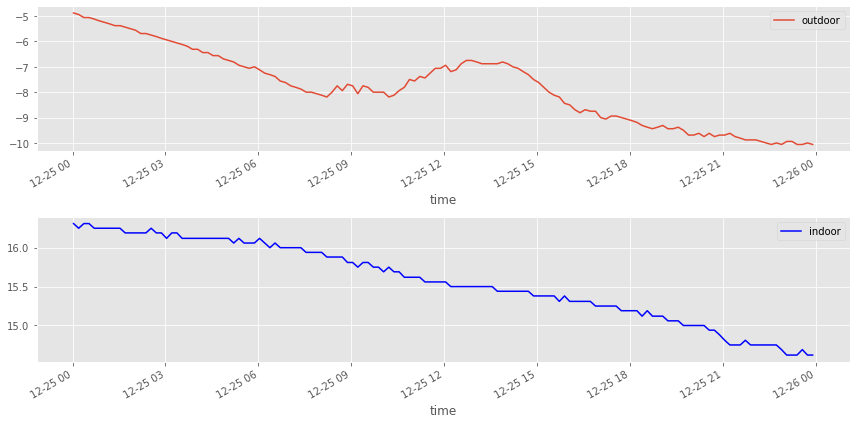

In [80]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

df1_dec25.plot(ax=ax1)
df2_dec25.plot(ax=ax2, color='blue')
fig.tight_layout()
#fig.savefig("ch12-timeseries-selected-month.pdf")

In [76]:
df1.index

DatetimeIndex(['2014-01-01 00:03:06+01:00', '2014-01-01 00:13:06+01:00',
               '2014-01-01 00:23:07+01:00', '2014-01-01 00:33:07+01:00',
               '2014-01-01 00:43:08+01:00', '2014-01-01 00:53:08+01:00',
               '2014-01-01 01:03:09+01:00', '2014-01-01 01:13:09+01:00',
               '2014-01-01 01:23:10+01:00', '2014-01-01 01:33:26+01:00',
               ...
               '2014-12-30 22:26:30+01:00', '2014-12-30 22:36:31+01:00',
               '2014-12-30 22:46:31+01:00', '2014-12-30 22:56:32+01:00',
               '2014-12-30 23:06:32+01:00', '2014-12-30 23:16:33+01:00',
               '2014-12-30 23:26:33+01:00', '2014-12-30 23:36:34+01:00',
               '2014-12-30 23:46:35+01:00', '2014-12-30 23:56:35+01:00'],
              dtype='datetime64[ns, Europe/Stockholm]', name='time', length=99095, freq=None)

# Seaborn statistical visualization library

In [86]:
sns.set(style="whitegrid")

In [ ]:
#sns.set(style="whitegrid")

In [84]:
df1 = pd.read_csv('data/out_temp.tsv', delimiter="\t", names=["time", "outdoor"])
df1.time = pd.to_datetime(df1.time.values, unit="s").tz_localize('UTC').tz_convert('Europe/Stockholm')

df1 = df1.set_index("time").resample("10min").mean()
df2 = pd.read_csv('data/int_temp.tsv', delimiter="\t", names=["time", "indoor"])
df2.time = pd.to_datetime(df2.time.values, unit="s").tz_localize('UTC').tz_convert('Europe/Stockholm')
df2 = df2.set_index("time").resample("10min").mean()

df_temp = pd.concat([df1, df2], axis=1)

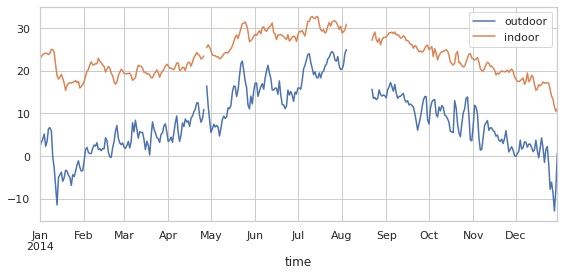

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
df_temp.resample("D").mean().plot(y=["outdoor", "indoor"], ax=ax)
fig.tight_layout()
#fig.savefig("ch12-seaborn-plot.pdf")

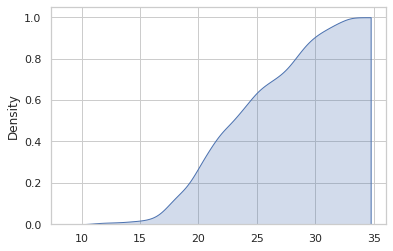

In [89]:
sns.kdeplot(df_temp["indoor"].dropna().values, shade=True, cumulative=True);

/home/dani/anaconda3/envs/fm/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
/home/dani/anaconda3/envs/fm/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/dani/anaconda3/envs/fm/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
/home/dani/anaconda3/envs/fm/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displ

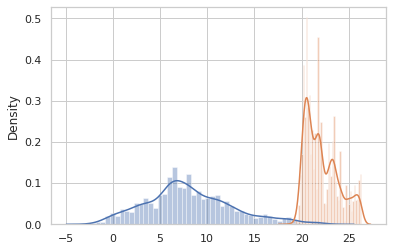

In [92]:
sns.distplot(df_temp.to_period("M")["outdoor"]["2014-04"].dropna().values, bins=50);
sns.distplot(df_temp.to_period("M")["indoor"]["2014-04"].dropna().values, bins=50);

#plt.savefig("ch12-seaborn-distplot.pdf")

/home/dani/anaconda3/envs/fm/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


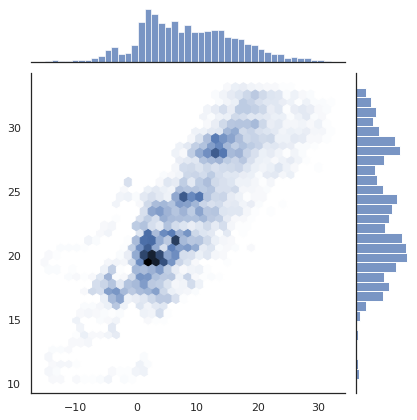

In [93]:
with sns.axes_style("white"):
    sns.jointplot(df_temp.resample("H").mean()["outdoor"].values,
                  df_temp.resample("H").mean()["indoor"].values, kind="hex");
    
#plt.savefig("ch12-seaborn-jointplot.pdf")

/home/dani/anaconda3/envs/fm/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


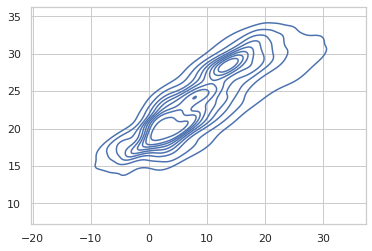

In [94]:
sns.kdeplot(df_temp.resample("H").mean()["outdoor"].dropna().values,
            df_temp.resample("H").mean()["indoor"].dropna().values, shade=False);

#plt.savefig("ch12-seaborn-kdeplot.pdf")

In [114]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

sns.boxplot(x='indoor', data=df_temp.dropna(), ax=ax1, palette="pastel",orient='v')
sns.violinplot(x='indoor', data=df_temp.dropna(), ax=ax2, palette="pastel",orient='v')

fig.tight_layout()
#fig.savefig("ch12-seaborn-boxplot-violinplot.pdf")

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fe0ea6fc940> (for post_execute):


KeyboardInterrupt: 

In [116]:
sns.violinplot(x=df_temp.dropna().index.month, y=df_temp.dropna().outdoor, color="skyblue");

#plt.savefig("ch12-seaborn-violinplot.pdf")

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fe0e9cc3b80> (for post_execute):


KeyError: (84.78637602179836, 0.0, '84.78637602179836', '.15', 'top', 'center', -8704514082418214221, None, None, False, 72.0, <weakref at 0x7fe0cae81860; to 'RendererAgg' at 0x7fe0cb14e940>, 1.2)

KeyError: (84.78637602179836, 0.0, '84.78637602179836', '.15', 'top', 'center', -8704514082418214221, None, None, False, 72.0, <weakref at 0x7fe0cae81860; to 'RendererAgg' at 0x7fe0cb14e940>, 1.2)

<Figure size 432x288 with 1 Axes>

In [117]:
df_temp["month"] = df_temp.index.month
df_temp["hour"] = df_temp.index.hour

In [118]:
df_temp.head()

,outdoor,indoor,month,hour
time,,,,
2014-01-01 00:00:00+01:00,4.38,21.94,1,0
2014-01-01 00:10:00+01:00,4.25,22.00,1,0
2014-01-01 00:20:00+01:00,4.19,22.00,1,0
2014-01-01 00:30:00+01:00,4.06,22.00,1,0
2014-01-01 00:40:00+01:00,4.06,22.00,1,0


In [119]:
table = pd.pivot_table(df_temp, values='outdoor', index=['month'], columns=['hour'], aggfunc=np.mean)

In [120]:
table

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
month,,,,,,,,,,,,,,,,,,,,,
1,-1.692312,-1.750162,-1.826649,-1.879086,-1.922527,-1.968065,-2.020914,-2.035806,-2.101774,-2.001022,...,-1.457849,-1.696935,-1.814194,-1.812258,-1.853297,-1.898432,-1.839730,-1.806486,-1.854462,-1.890811
2,1.613690,1.521190,1.479405,1.464371,1.506407,1.485595,1.499167,1.516946,1.669226,2.067725,...,3.573593,3.360741,2.939390,2.501607,2.357425,2.236190,2.204458,2.137619,2.024671,1.896190
3,3.192366,2.866774,2.628000,2.524140,2.384140,2.235538,2.243387,2.622258,3.419301,4.466290,...,7.790323,7.930914,7.595892,6.770914,5.731508,4.983784,4.437419,4.022312,3.657903,3.407258
4,5.832738,5.336012,4.926667,4.597059,4.380000,4.109769,4.123699,4.741437,5.878035,7.272299,...,12.175556,12.500059,12.494483,12.361156,11.989240,10.454881,8.857619,7.712619,6.974762,6.293512
5,9.792204,9.369351,9.009839,8.670914,8.463387,8.446919,8.772324,9.562742,10.723622,12.047717,...,15.542581,15.744624,15.784839,15.799570,17.009892,15.685161,13.632796,12.216290,11.291237,10.622849
6,13.209556,12.792889,12.382889,11.967889,11.735778,11.886667,12.503778,13.338167,14.343444,15.665475,...,18.630556,18.866292,18.680611,18.529832,20.057877,18.853389,16.969777,15.675111,14.658778,13.898167
7,17.956344,17.348641,16.793152,16.309892,16.001559,15.986774,16.506613,17.478226,18.850054,20.533763,...,24.598441,25.030000,24.869194,24.764409,26.155161,24.896505,22.550269,20.882649,19.699022,18.822634
8,14.498205,13.960128,13.555128,12.995641,12.651410,12.485974,12.680130,13.403506,14.578780,16.170833,...,20.473810,20.292381,20.328795,19.642436,19.373846,18.713462,17.034872,15.843590,15.146154,14.596667
9,11.133000,10.725667,10.362444,9.976833,9.729333,9.503944,9.357500,9.689778,10.600778,11.829106,...,16.336983,16.828268,17.031056,16.786983,15.853556,14.534637,13.350444,12.545278,11.954190,11.399056


In [121]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.heatmap(table, ax=ax);

fig.tight_layout()
#fig.savefig("ch12-seaborn-heatmap.pdf")

KeyError: (84.78637602179836, 0.0, '84.78637602179836', '.15', 'top', 'center', -8704514082418214221, None, None, False, 72.0, <weakref at 0x7fe0cae81860; to 'RendererAgg' at 0x7fe0cb14e940>, 1.2)

KeyError: (84.78637602179836, 0.0, '84.78637602179836', '.15', 'top', 'center', -8704514082418214221, None, None, False, 72.0, <weakref at 0x7fe0cae81860; to 'RendererAgg' at 0x7fe0cb14e940>, 1.2)

<Figure size 576x288 with 2 Axes>